<a href="https://colab.research.google.com/github/Felipesmarq/AnaliseF1/blob/main/AnaliseF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving DriversStandings.csv to DriversStandings.csv
Saving ConstructorStandings.csv to ConstructorStandings.csv
Saving AllRace.csv to AllRace.csv


In [3]:
import pandas as pd

df_race = pd.read_csv('AllRace.csv')
df_cs = pd.read_csv('ConstructorStandings.csv')
df_ds = pd.read_csv('DriversStandings.csv')

# datasets

### race - All race informations
### cs - Constructor Standings
### ds - Drivers Standings

## The data is from 1950-2020.


#### In the race data frame contains the name of the race(where it occurred), date of the race and all drivers standings

In [4]:
df_race.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,Great Britain,13-May-50,Nino Farina FAR,Luigi Fagioli FAG,Reg Parnell PAR,Yves Giraud Cabantous CAB,Louis Rosier ROS,Bob Gerard GER,Cuth Harrison HAR,Philippe Etancelin ETA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,21-May-50,Juan Manuel Fangio FAN,Alberto Ascari ASC,Louis Chiron CHI,Raymond Sommer SOM,Prince Bira BIR,Bob Gerard GER,Johnny Claes CLA,Luigi Villoresi VIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indianapolis 500,30-May-50,Johnnie Parsons PAR,Bill Holland HOL,Mauri Rose ROS,Cecil Green GRE,Joie Chitwood CHI,Tony Bettenhausen BET,Lee Wallard WAL,Walt Faulkner FAU,...,Henry Banks BAN,Fred Agabashian AGA,Bill Schindler SCH,Bayliss Levrett LEV,Bill Cantrell CAN,Jimmy Jackson JAC,Sam Hanks HAN,Dick Rathmann RAT,Duke Dinsmore DIN,NaN
3,Switzerland,04-Jun-50,Nino Farina FAR,Luigi Fagioli FAG,Louis Rosier ROS,Prince Bira BIR,Felice Bonetto BON,Toulo de Graffenried DEG,Nello Pagani PAG,Harry Schell SCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,18-Jun-50,Juan Manuel Fangio FAN,Luigi Fagioli FAG,Louis Rosier ROS,Nino Farina FAR,Alberto Ascari ASC,Luigi Villoresi VIL,Pierre Levegh LEV,Johnny Claes CLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####In the Constructor Standings dataset, each line contains the position, name of the team, points made by that team and the year.

In [5]:
df_cs.head()

,Unnamed: 0,Pos,Team,PTS,Year
0,0,1,Vanwall,48,1958
1,1,2,Ferrari,40,1958
2,2,3,Cooper Climax,31,1958
3,3,4,BRM,18,1958
4,4,5,Maserati,6,1958


#### The Drivers Standings compiles in each line the position of the driver, have the name of the driver(with 3 letters that represent the name of the driver), nacionality, car, points made in the year and the year

In [6]:
df_ds

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
0,0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...,...
1568,1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,1569,18,Kimi Räikkönen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


In [7]:
posicoes = [str(i) for i in range(1, 36)]

pilotos = df_race[posicoes].values.flatten()

pilotos_series = pd.Series(pilotos).dropna()

participacoes = pilotos_series.value_counts().reset_index()

participacoes.columns = ["Corredor", "Corridas"]

corridas = df_race.shape[0]

participacoes["% Participações"] = (participacoes["Corridas"] / corridas * 100).round(2)

participacoes.head(10)

,Corredor,Corridas,% Participações
0,Kimi RÃ¤ikkÃ¶nen RAI,319,31.12
1,Rubens Barrichello BAR,316,30.83
2,Fernando Alonso ALO,310,30.24
3,Jenson Button BUT,302,29.46
4,Michael Schumacher MSC,297,28.98
5,Felipe Massa MAS,265,25.85
6,Lewis Hamilton HAM,254,24.78
7,Jarno Trulli TRU,252,24.59
8,Riccardo Patrese PAT,248,24.20
9,David Coulthard COU,245,23.90


In [8]:
podio = ["1", "2", "3"]

pilotos_podio = pd.Series(df_race[podio].values.flatten()).dropna()

df_podios = pilotos_podio.value_counts().reset_index()

df_podios.columns = ["Corredor", "Podios"]

df_podios["% Podios"] = (df_podios["Podios"] / corridas * 100).round(2)

df_podios.head(10)

,Corredor,Podios,% Podios
0,Lewis Hamilton HAM,156,15.22
1,Michael Schumacher MSC,153,14.93
2,Sebastian Vettel VET,118,11.51
3,Alain Prost PRO,106,10.34
4,Kimi RÃ¤ikkÃ¶nen RAI,102,9.95
5,Fernando Alonso ALO,96,9.37
6,Ayrton Senna SEN,79,7.71
7,Rubens Barrichello BAR,67,6.54
8,David Coulthard COU,62,6.05
9,Nelson Piquet PIQ,60,5.85


In [9]:
hamilton_podio = df_race[df_race[["1", "2", "3"]].isin(["Lewis Hamilton HAM"]).any(axis=1)]

vettel_podio = df_race[df_race[["1", "2", "3"]].isin(["Sebastian Vettel VET"]).any(axis=1)]

ambos_podio = df_race[df_race[["1", "2", "3"]].isin(["Lewis Hamilton HAM", "Sebastian Vettel VET"]).sum(axis=1) == 2]

p_uniao = (len(hamilton_podio) + len(vettel_podio) - len(ambos_podio)) / corridas
print(f"Probabilidade união de Lewis Hamilton ou Sebastian Vettel estarem no pódio: {p_uniao:.2%}")

Probabilidade união de Lewis Hamilton ou Sebastian Vettel estarem no pódio: 21.37%


In [10]:
hamilton_vettel_juntos = df_race[df_race[["1", "2", "3"]].isin(["Lewis Hamilton HAM", "Sebastian Vettel VET"]).sum(axis=1) == 2]
p_interseccao = len(hamilton_vettel_juntos) / corridas
print(f"Probabilidade de Hamilton e Vettel estarem no pódio ao mesmo tempo: {p_interseccao:.2%}")

Probabilidade de Hamilton e Vettel estarem no pódio ao mesmo tempo: 5.37%


In [11]:
schumi_podio = df_race[df_race[["1", "2", "3"]].isin(["Michael Schumacher MSC"]).any(axis=1)]
alonso_podio = df_race[df_race[["1", "2", "3"]].isin(["Fernando Alonso ALO"]).any(axis=1)]
ambos_podio = df_race[df_race[["1", "2", "3"]].isin(["Michael Schumacher MSC", "Fernando Alonso ALO"]).sum(axis=1) == 2]

p_uniao = (len(schumi_podio) + len(alonso_podio) - len(ambos_podio)) / corridas
print(f"Probabilidade união de Michael Shumacher ou Fernando Alonso estarem no pódio: {p_uniao:.2%}")

Probabilidade união de Michael Shumacher ou Fernando Alonso estarem no pódio: 22.63%


In [12]:
schumi_alonso_juntos = df_race[df_race[["1", "2", "3"]].isin(["Michael Schumacher MSC", "Fernando Alonso ALO"]).sum(axis=1) == 2]
p_interseccao = len(schumi_alonso_juntos) / corridas
print(f"Probabilidade de Schumacher e Alonso estarem no pódio ao mesmo tempo: {p_interseccao:.2%}")

Probabilidade de Schumacher e Alonso estarem no pódio ao mesmo tempo: 1.66%


In [13]:
piloto_nacionalidade = df_ds[["Driver", "Nationality"]].drop_duplicates().reset_index(drop=True)
piloto_nacionalidade

,Driver,Nationality
0,Nino Farina FAR,ITA
1,Juan Manuel Fangio FAN,ARG
2,Luigi Fagioli FAG,ITA
3,Louis Rosier ROS,FRA
4,Alberto Ascari ASC,ITA
...,...,...
384,Sergey Sirotkin SIR,RUS
385,Alexander Albon ALB,THA
386,Lando Norris NOR,GBR
387,George Russell RUS,GBR


In [14]:
alemao = piloto_nacionalidade[piloto_nacionalidade["Nationality"] == "GER"]["Driver"].tolist()
ingleses = piloto_nacionalidade[piloto_nacionalidade["Nationality"] == "GBR"]["Driver"].tolist()

alemao_podio = df_race[df_race[["1", "2", "3"]].isin(alemao).any(axis=1)]
ingleses_podio = df_race[df_race[["1", "2", "3"]].isin(ingleses).any(axis=1)]
ambos_podio = df_race[df_race[["1", "2", "3"]].isin(alemao + ingleses).sum(axis=1) >= 2]

p_uniao = (len(alemao_podio) + len(ingleses_podio) - len(ambos_podio)) / corridas

print(f"Chance de pelo menos um alemão ou pelo menos um ingles estarem no pódio: {p_uniao:.2%}")

Chance de pelo menos um alemão ou pelo menos um ingles estarem no pódio: 60.78%


In [ ]:
tem_alemao = df_race[["1", "2", "3"]].isin(alemao).any(axis=1)
tem_ingleses = df_race[["1", "2", "3"]].isin(ingleses).any(axis=1)

alemao_ingles_juntos = df_race[tem_alemao & tem_ingleses]
p_interseccao = len(alemao_ingles_juntos) / corridas
print(f"Probabilidade de um alemão e um britânico estarem juntos no pódio: {p_interseccao:.2%}")

Probabilidade de um alemão e um britânico estarem juntos no pódio: 21.27%


In [15]:
brasileiros = piloto_nacionalidade[piloto_nacionalidade["Nationality"] == "BRA"]["Driver"].tolist()

tem_brasileiro = []

for _, row in df_race.iterrows():
  pilotos_corrida = [p for p in row[2:] if pd.notna(p)]
  tem_brasileiro.append(any(piloto in brasileiros for piloto in pilotos_corrida))

df_race['Tem_Brasileiro'] = tem_brasileiro


corridas_sem_brasileiros = sum(~df_race['Tem_Brasileiro'])

p_nao_brasileiros = corridas_sem_brasileiros / corridas

print(f"Probabilidade de não haver brasileiros em uma corrida: {p_nao_brasileiros:.2%}")

Probabilidade de não haver brasileiros em uma corrida: 23.90%


In [16]:
tem_ingles = df_race[["1", "2", "3"]].isin(ingleses).any(axis=1)
p_ingles = tem_ingles.sum() / corridas

ingles_no_podio = df_race[["1", "2", "3"]].isin(ingleses).any(axis=1).sum()
ingles_fora_podio = len(df_race) - ingles_no_podio
p_ingles_fora = ingles_fora_podio / corridas

print(f"Probabilidade de ser britânico e NÃO estar no pódio: {p_ingles_fora:.2%}")

Probabilidade de ser britânico e NÃO estar no pódio: 43.32%


In [17]:
p_schumacher_nao_podio = 1 - (len(schumi_podio) / corridas)
print(f"Probabilidade de Schumacher NÃO estar no pódio: {p_schumacher_nao_podio:.2%}")

Probabilidade de Schumacher NÃO estar no pódio: 85.07%


In [18]:
p_ham = len(hamilton_podio) / corridas
p_vet_e_ham = len(hamilton_vettel_juntos) / corridas
p_vet_dado_ham = p_vet_e_ham / p_ham
print(f"Probabilidade de Vettel estar no pódio dado que Hamilton está: {p_vet_dado_ham:.2%}")

Probabilidade de Vettel estar no pódio dado que Hamilton está: 35.26%


In [19]:
p_brit_dado_podio = ingles_no_podio / (corridas * 3)
print(f"Probabilidade de um britânico no pódio dado que há pódio: {p_brit_dado_podio:.2%}")


Probabilidade de um britânico no pódio dado que há pódio: 18.89%


In [28]:
df_race['Ano'] = pd.to_datetime(df_race['Date']).dt.year
apos_2000 = df_race[df_race['Ano'] >= 2000]
p_brasileiro_dado_apos_2000 = apos_2000['Tem_Brasileiro'].sum() / len(apos_2000)

print(f"Probabilidade de ter brasileiro após o ano 2000: {p_brasileiro_dado_apos_2000:.2%}")

Probabilidade de ter brasileiro após o ano 2000: 62.64%


In [29]:
p_brasileiro = df_race['Tem_Brasileiro'].mean()
bras_podio = df_race[df_race[["1", "2", "3"]].isin(brasileiros).any(axis=1)]
p_podio = 1.0
p_podio_dado_brasileiro = len(bras_podio) / df_race['Tem_Brasileiro'].sum()
p_brasileiro_dado_podio = (p_podio_dado_brasileiro * p_brasileiro) / p_podio

print(f"Probabilidade de ser brasileiro dado que está no pódio: {p_brasileiro_dado_podio:.2%}")

Probabilidade de ser brasileiro dado que está no pódio: 26.05%


In [30]:
p_schu = len(schumi_podio) / corridas
p_schu_dado_podio = p_schu / p_podio
print(f"Probabilidade de ser Schumacher dado que está no pódio: {p_schu_dado_podio:.2%}")

Probabilidade de ser Schumacher dado que está no pódio: 14.93%


In [31]:
p_ham = len(hamilton_podio) / corridas
p_ham_dado_podio = p_ham / p_podio
print(f"Probabilidade de ser Hamilton dado que está no pódio: {p_ham_dado_podio:.2%}")

Probabilidade de ser Hamilton dado que está no pódio: 15.22%


In [32]:
def contar_alemaes(row):
    return sum([1 for pos in ["1", "2", "3"] if row[pos] in alemao])

df_race['Alemaes_Podio'] = df_race.apply(contar_alemaes, axis=1)
df_race[['Alemaes_Podio']].value_counts()

,count
Alemaes_Podio,
0,667
1,308
2,50


In [44]:
fp = df_race['Alemaes_Podio'].value_counts(normalize=True).sort_index()

fp_df = fp.reset_index()
fp_df.columns = ['Número de Alemães no Pódio', 'Probabilidade']
fp_df['count (%)'] = (fp_df['Probabilidade'] * 100).round(2)
fp_df = fp_df.drop(columns='Probabilidade')
fp_df.set_index('Número de Alemães no Pódio', inplace=True)

display(fp_df)

,count (%)
Número de Alemães no Pódio,
0,65.07
1,30.05
2,4.88


In [43]:
fp_bras = df_race['Qtd_Brasileiros'].value_counts(normalize=True).sort_index() * 100

fp_bras_df = fp_bras.reset_index()
fp_bras_df.columns = ['Qtd_Brasileiros', 'count (%)']
fp_bras_df.set_index('Qtd_Brasileiros', inplace=True)

display(fp_bras_df)

,count (%)
Qtd_Brasileiros,
0,23.902439
1,15.317073
2,32.975610
3,23.609756
4,4.195122


In [45]:
fp.cumsum()

,proportion
Alemaes_Podio,
0,0.650732
1,0.951220
2,1.000000


In [46]:
fp_bras.cumsum()

,proportion
Qtd_Brasileiros,
0,23.902439
1,39.219512
2,72.195122
3,95.804878
4,100.000000


In [48]:
import matplotlib.pyplot as plt

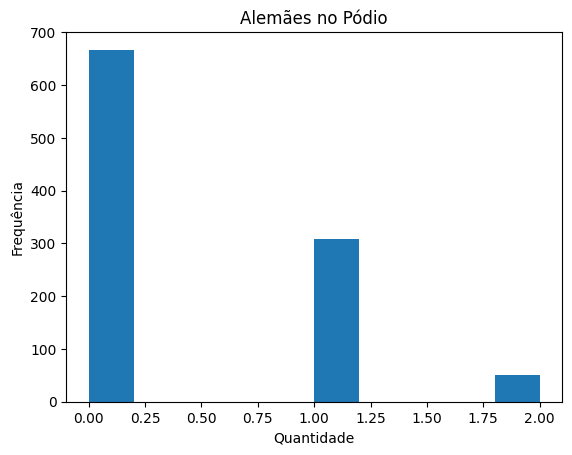

In [49]:
plt.hist(df_race['Alemaes_Podio'])
plt.title('Alemães no Pódio')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

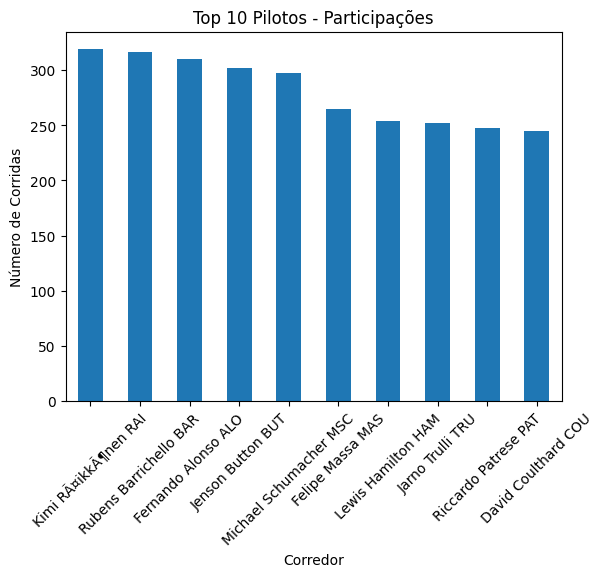

In [50]:
participacoes.set_index('Corredor')['Corridas'].head(10).plot(kind='bar')
plt.title('Top 10 Pilotos - Participações')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.show()

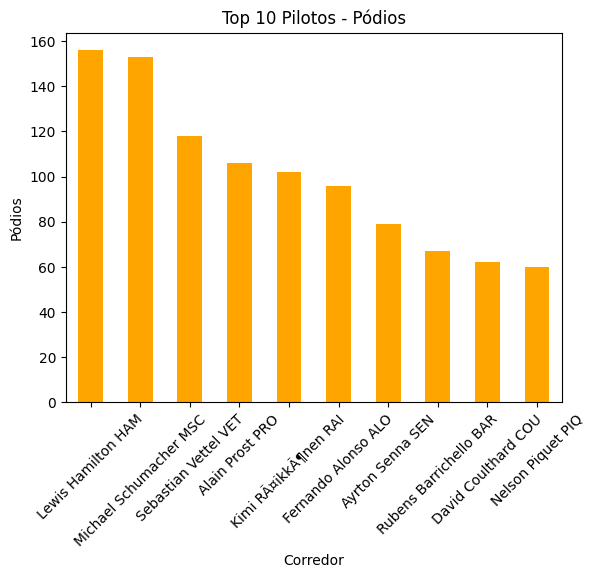

In [51]:
df_podios.set_index('Corredor')['Podios'].head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Pilotos - Pódios')
plt.ylabel('Pódios')
plt.xticks(rotation=45)
plt.show()

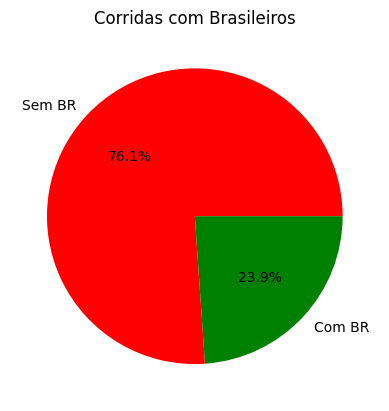

In [52]:
df_race['Tem_Brasileiro'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Sem BR', 'Com BR'], colors=['red', 'green'])
plt.title('Corridas com Brasileiros')
plt.ylabel('')
plt.show()

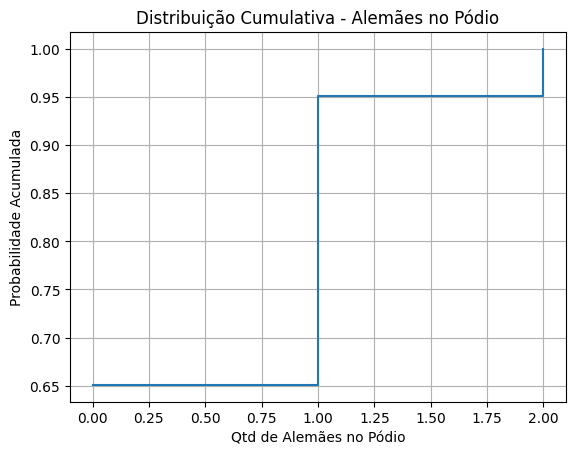

In [53]:
fp.cumsum().plot(drawstyle='steps-post')
plt.title('Distribuição Cumulativa - Alemães no Pódio')
plt.xlabel('Qtd de Alemães no Pódio')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.show()

In [54]:
variancia = df_race['Alemaes_Podio'].var()
desvio_padrao = df_race['Alemaes_Podio'].std()
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")


Variância: 0.34
Desvio Padrão: 0.58


In [55]:
df_race[['Alemaes_Podio', 'Qtd_Brasileiros']].cov()

,Alemaes_Podio,Qtd_Brasileiros
Alemaes_Podio,0.337496,0.171853
Qtd_Brasileiros,0.171853,1.417696


In [56]:
df_race[['Alemaes_Podio', 'Tem_Brasileiro']].cov()

,Alemaes_Podio,Tem_Brasileiro
Alemaes_Podio,0.337496,0.064963
Tem_Brasileiro,0.064963,0.182069


In [57]:
df_race[['Alemaes_Podio', 'Qtd_Brasileiros']].corr()

,Alemaes_Podio,Qtd_Brasileiros
Alemaes_Podio,1.000000,0.248446
Qtd_Brasileiros,0.248446,1.000000


In [58]:
df_race[['Tem_Brasileiro', 'Qtd_Brasileiros']].corr()

,Tem_Brasileiro,Qtd_Brasileiros
Tem_Brasileiro,1.000000,0.795297
Qtd_Brasileiros,0.795297,1.000000
